## Bias - Topic 3 from 'Fundamentals of Data Analysis'

### Exercise 1: Give three real-world examples of different types of cognitive bias.

### Anchoring Bias

An anchor is a reference point around which future decisions are made.<br> 
Purchasing a car exploits this bias, because the majority of prospective customers will try to negotiate lower than the price (the anchor).
In this example, the car salesperson has set the anchor and therefore is trying to steer future decisions in their favour.
See [Judgement under Uncertainty: Heuristics and Biases](https://www2.psych.ubc.ca/~schaller/Psyc590Readings/TverskyKahneman1974.pdf) for more information on anchoring

### The Bandwagon Effect

This bias implies that you're more likely to hold a belief if it's held by the majority of people.<br>

*If many people believe it, how can it not be true?*<br>

In fact, there's an old saying in the financial markets where if someone on the street gives you tips on what stocks to buy, then it's actually time to sell them.
This is because the stock of a company is overvalued if everyone is buying it and they don't know why.

### Stereotyping

A bias where someone is expected to have the traits of the social and/or racial group that they belong to. In many cases, these traits are often false, but far-right groups have exploited this to come to prominence again in continental Europe in recent years.

### Conclusion

I found this assignment an interesting one - I got to see my own biases.
Whilst reading around biases I also saw the biases that the Brexit 'Leave' campaign used to successfully win the referendum:
- Confirmation bias
- Conservatism bias
- Bandwagon effect
- Dunning Kruger effect
- Strawman bias

Because the more popular examples of confirmation bias and Dunning-Kruger effect were spoken about in the lecture videos, I chose to leave them out.

### References

1. [Cognitive bias examples from Psychmechanics](https://www.psychmechanics.com/cognitive-biases-examples/)
2. [Judgement under Uncertainty: Heuristics and Biases](https://www2.psych.ubc.ca/~schaller/Psyc590Readings/TverskyKahneman1974.pdf) by Amos Tversky and Daniel Kahneman
3. [An example of the Bandwagon effect from the financial world](https://archive.fortune.com/magazines/fortune/fortune_archive/1996/04/15/211503/index.htm)
4. [Cognitive bias Codex](https://upload.wikimedia.org/wikipedia/commons/c/ce/Cognitive_Bias_Codex_With_Definitions%2C_an_Extension_of_the_work_of_John_Manoogian_by_Brian_Morrissette.jpg)
5. [Cognitive bias examples from Positive Psychology](https://positivepsychology.com/cognitive-biases/)
6. [Ian's notebook on statistical and cognitive bias](https://github.com/ianmcloughlin/2223-S1-fund-data-analysis/blob/main/notebooks/03-bias.ipynb)

### Exercise 2: <br>Show that the difference between the standard deviation calculations is greatest for small sample sizes

*Standard deviation* refers to how dispersed (deviated) a dataset is from it's mean.
It's calculated as the square root of the variance.<br>

*Variance* refers to how far away a point in the data set is from the mean - it is the spread of the overall data from the mean.

$s_{N - 1} = \sqrt {\frac{1}{{N - 1}}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 } }$

For this exercise, Bessel's correction will be used:
$\frac{n}{n-1}$

Where $n$ is the sample size.

For large values of $n$, the above will just approximate to $n$, whereas for small values, the signficance should be observed. Bessel's correction 'unbiases' the calculation by using $n-1$ instead of $n$.
Another way of stating the above would be to say that as the *sample size* approaches the *population size*, Bessel's correction just approximates to the 'normal' standard deviation calculation.

After:
- Importing libraries
- Generating an array of sample sizes to loop through.

The process will be:

1. Find the population mean
2. Subtract mean from each data point and square the answer
3. Add all the squared differences and subtract them from the total number of data points minus 1.
4. Square root the answer from 3)

Finally, a plot to show the standard deviation method from numpy vs the standard deviation using Bessel's correction.


In [2]:
# Import libraries
# Numerical arrays.
import numpy as np

# Plots.
import matplotlib.pyplot as plt

In [366]:
input_sample2 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# Convert to numpy array
sample_sizes = np.asarray(input_sample2)
sample_sizes

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

Generate samples where the sample sizes are specified in the list *input_sample2*.

In [330]:
# Generate a sample of random values that match the normal distribution.
# Mean is 5.0, std dev is 1.0, sample size = 100
y = []
y = np.asarray(y)
#create empty lists to append variances and standard deviations to.
# standard deviations
std_devs = []
std_devs = np.asarray(std_devs)

# uncorrected variance
variance = []
variance = np.asarray(variance)

# Bessel's correction
variance_B = []
variance_B = np.asarray(variance_B)

# Uncorrected standard deviation
std_dev_unc = []
std_dev_unc = np.asarray(std_dev_unc)

# Bessel's corrected standard deviation
std_dev_Bes = []
std_dev_Bes = np.asarray(std_dev_Bes)

for p in sample_sizes:
    x = np.random.normal(5.0, 1.0, p)
    print(f'\narray for sample size {p}:')
    # concatenate y
    #new_Array = np.insert(y, x)
    # Below works,but dumps everything in array - no seperation
    #new_arr = np.concatenate( (y, x), axis = 0 )
    #np.append(y, x, axis=0)
    #print(new_Array)
    #
    # print array
    print(x)
    
    #### Step 1 ###########
    
    # Calculate the mean.
    x_mean = x.mean()
    print(f'\nmean for x when sample size is {p}:\n{x_mean}')
    # Standard deviation
    std_devs = np.append(std_devs, x.std())
    print(f'\nstd dev for x when sample size is {p}:\n{x.std()}')

    # Subtract the mean from each of the values.
    zeroed = x - x_mean

    # Have a look at the zeroed values.
    print(f'\nThese are the zeroed values: \n{zeroed}')
    
    # Get the zeroed mean
    print(f'\nThis is the zeroed mean: \n{zeroed.mean():0.4f}')
    
    ##### Step 2 ###############
    
    # Uncorrected variance.
    # assign to variable
    v = np.mean(np.square(x - np.mean(x)))
    # append variance to list.
    variance = np.append(variance, v)
    print(f'\nThis is the uncorrected variance for sample size {p}:\n{np.mean(np.square(x - np.mean(x)))}')
    # Uncorrected standard deviation (from above:)
    std_dev_unc_i = np.sqrt(v)
    std_dev_unc = np.append(std_dev_unc, std_dev_unc_i)
    print(f'\nThe uncorrected standard deviation for sample size {p} is :\n {np.sqrt(v)}')
    
    ##### Step 3 ################
    # Bessel's Correction
    # assign to variable
    b = np.mean(np.square(x - np.mean(x))) * (len(x) / (len(x) - 1.0))
    # append variable to list
    variance_B = np.append(variance_B, b)
    variance_B_j = np.sqrt(b)
    
    
    ##### Step 4 ################
    # Corrected variance.
    print(f'\nBessels correction for variance for sample size {p}:\n{np.mean(np.square(x - np.mean(x))) * (len(x) / (len(x) - 1.0))}')
    std_dev_Bes = np.append(std_dev_Bes, variance_B_j)
    print(f'\nThe standard deviation using Bessels correction is: \n{np.sqrt(b)}')
    #y = np.append(y,[x])
    #print(y)
# This is only giving last sample from input as array
#print(f'This is the new_Arr:{new_Array}')
#print(x)
# Print lists of interest:
print()
print(f'\nstandard deviations for sample sizes specified: \n{std_devs}')
print(f'\n variances for sample sizes specified: \n{variance}')
print(f'\n Bessels corrected variances for sample sizes specified: \n{variance_B}')
print(f'\n Uncorrected standard deviations for sample sizes specified: \n{std_dev_unc}')
print(f'\n Standard deviations using Bessels correction for sample sizes specified: \n{std_dev_Bes}')
#print(f'This is y: {y}')


array for sample size 10:
[4.711236   4.79298858 5.78335237 6.33725834 5.70435128 4.38625403
 5.64862038 4.72599825 5.48176618 5.32779231]

mean for x when sample size is 10:
5.289961772206371

std dev for x when sample size is 10:
0.5827081192858775

These are the zeroed values: 
[-0.57872577 -0.49697319  0.4933906   1.04729656  0.41438951 -0.90370774
  0.35865861 -0.56396352  0.19180441  0.03783054]

This is the zeroed mean: 
-0.0000

This is the uncorrected variance for sample size 10:
0.3395487522816844

The uncorrected standard deviation for sample size 10 is :
 0.5827081192858775

Bessels correction for variance for sample size 10:
0.3772763914240938

The standard deviation using Bessels correction is: 
0.6142282893388205

array for sample size 20:
[5.10766573 6.24632438 5.94482499 5.30388954 4.10640795 4.76028965
 5.90085998 5.09260421 4.23223911 3.69964253 3.6083539  4.58686741
 3.56674062 5.4190015  4.48727458 3.53480794 4.85138394 5.91120566
 4.97702323 4.90350203]

mean for

### Standard deviation from uncorrected variance:
Now print the standard deviation for the different sample sizes by getting the square root of the uncorrected variance:

In [331]:
print(f'The uncorrected variance: \n{variance}\n')
print('and the standard deviations for each sample size below:\n')
for i in variance:
    print(np.sqrt(i))

The uncorrected variance: 
[0.33954875 0.67044745 0.76544355 1.0917389  1.30239868 0.83049117
 0.77666776 1.24933969 0.99308836 1.02358161]

and the standard deviations for each sample size below:

0.5827081192858775
0.81880855706517
0.8748963081703125
1.0448631010184257
1.1412268297034671
0.9113128847613903
0.8812875572263232
1.1177386495946247
0.9965381870441915
1.0117221000072742


Comparing with the standard deviations of numpy's inbuilt method for finding standard deviation:

In [332]:
print(f'\nstandard deviations for sample sizes specified using numpy:')
for k in std_devs:
    print(k)


standard deviations for sample sizes specified using numpy:
0.5827081192858775
0.81880855706517
0.8748963081703125
1.0448631010184257
1.1412268297034671
0.9113128847613903
0.8812875572263232
1.1177386495946247
0.9965381870441915
1.0117221000072742


### Standard deviation from Bessel's correction:
Get the square root from Bessel's corrected variance:

In [336]:
print(f'\nStandard deviation calculated using Bessels correction: \n{std_dev_Bes}')


Standard deviation calculated using Bessels correction: 
[0.61422829 0.84007985 0.88985288 1.058174   1.15281319 0.91900343
 0.88765073 1.1247907  1.00212108 1.01681897]


Plot a histogram of the uncorrected standard deviations, i.e. the inbuilt numpy method and uncorrected calculation (which are equal)

(array([1., 0., 0., 1., 2., 1., 2., 1., 2.]),
 array([0.58270812, 0.64476575, 0.70682339, 0.76888102, 0.83093866,
        0.89299629, 0.95505393, 1.01711156, 1.0791692 , 1.14122683]),
 <BarContainer object of 9 artists>)

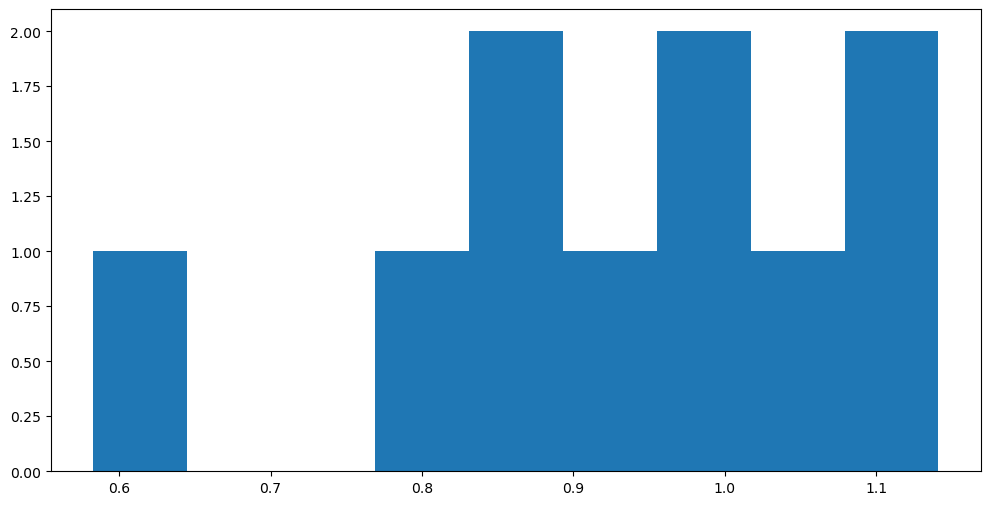

In [344]:
# View a histogram - hopefully we can see the estimate is too small.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram.
plt.hist(std_devs, bins=9)

Now plot the standard deviation from Bessel's correction:

(array([1., 0., 0., 1., 2., 1., 2., 1., 2.]),
 array([0.61422829, 0.67407106, 0.73391382, 0.79375659, 0.85359935,
        0.91344212, 0.97328489, 1.03312765, 1.09297042, 1.15281319]),
 <BarContainer object of 9 artists>)

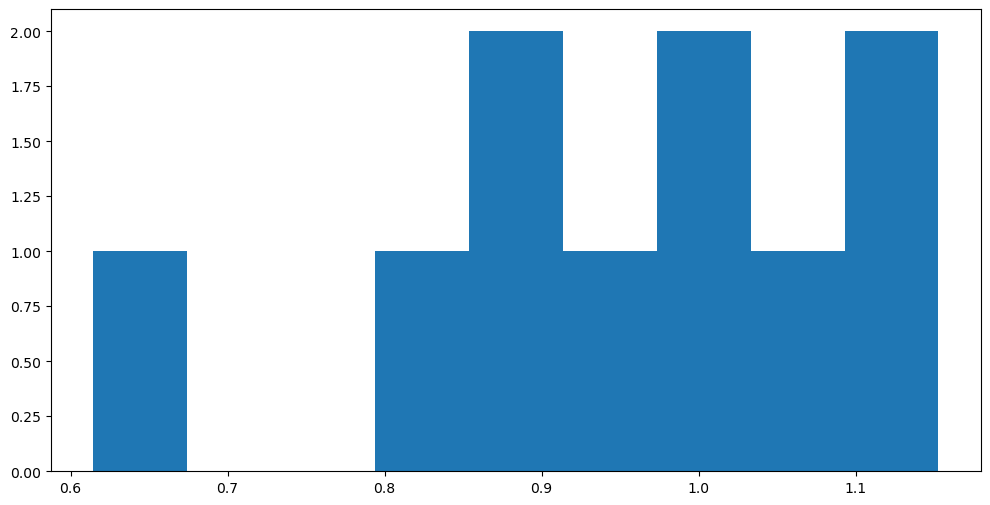

In [345]:
# View a histogram - hopefully we can see the estimate is too small.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram.
plt.hist(std_dev_Bes, bins=9)

Whilst it can't really be seen that clearly from the histograms, Bessel's correction is more useful for smaller sample sizes as it produces a value closer to the expected output (1, in this case).

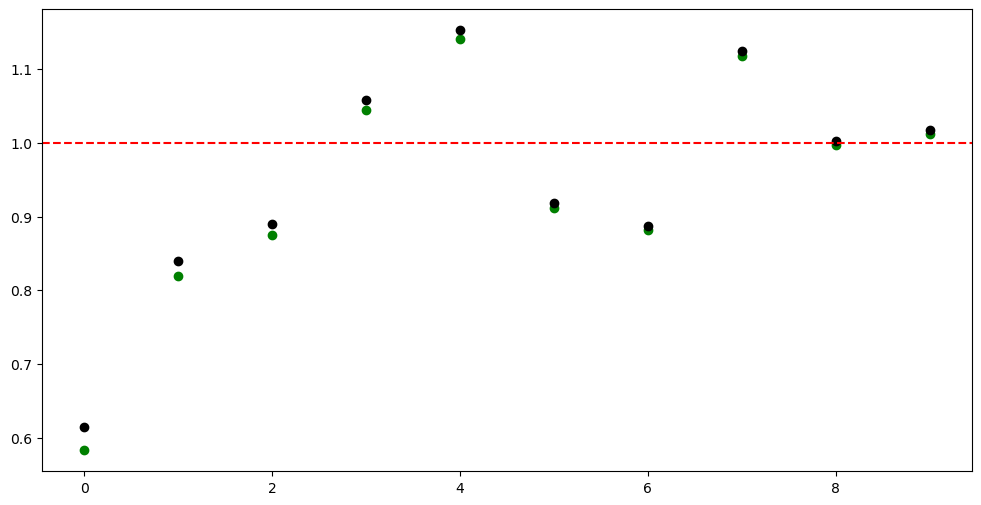

In [365]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the uncorrected standard variations in green
ax.plot(range(len(std_dev_unc)), std_dev_unc, color='green', marker='o', linestyle='none')

# Now plot standard deviation using Bessels correction:
ax.plot(range(len(std_dev_Bes)), std_dev_Bes, color='black', marker='o', linestyle='none')

# Draw a horizontal line where the actual standard deviation is.
plt.axhline(y=1.0, color='red', linestyle='dashed');

## Conclusion

As can be see from the plot above, the standard deviations using Bessel's correction are closer to the expected standard deviation for the smaller sample sizes. At the very start, standard deviation was specified to be 1.0.<br>

As the sample sizes increase, the difference becomes negligible, and so, in this case we see that above a sample size of 90, the difference between numpy's inbuilt calculation and using Bessel's becomes less important.

## References

1. [An explanation of variance](https://www.cuemath.com/data/variance/)
2. [Bessel's correction - Wikipedia](https://en.wikipedia.org/wiki/Bessel%27s_correction#:~:text=In%20statistics%2C%20Bessel%27s%20correction%20is%20the%20use%20of,bias%20in%20the%20estimation%20of%20the%20population%20variance.)
3. [Ian McLoughlin's notebook on Bias](https://github.com/ianmcloughlin/2223-S1-fund-data-analysis/blob/main/notebooks/03-bias.ipynb)
4. [Definition of standard deviation from wikipedia](https://en.wikipedia.org/wiki/Standard_deviation)
5. [Latex Equations](https://equplus.net/sheets/Equations-43/10.html)
6. [Statistics Book](https://theoryandpractice.org/stats-ds-book/statistics/bias-variance.html)
7. [Standard deviation explanation from a financial site](https://blog.quantinsti.com/standard-deviation/)
8. [STDEVP function in MS Excel](https://support.microsoft.com/en-us/office/stdevp-function-1f7c1c88-1bec-4422-8242-e9f7dc8bb195)
9. [STDEVS function in MS Excel](https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23)
10. [STDEV function in MS Excel (will be deprecated)](https://support.microsoft.com/en-us/office/stdev-function-51fecaaa-231e-4bbb-9230-33650a72c9b0)
11. [Spread of a data set](https://www.studypug.com/statistics-help/spread-of-a-data-set-standard-deviation-variance?camp_id=626095232&grp_id=1203966018925501&kw=statistics&mt=b&source=o&pos=&tgt=dat-2327047641150278:loc-92&loc=150405&device=c&adid=&msclkid=f7c8888615021e734a27ebf5d7150e93&utm_source=bing&utm_medium=cpc&utm_campaign=Tier%201%20UK%20-%20Dynamic%20Search%20-%20CPC&utm_term=statistics&utm_content=Dynamic%20-%20Statistics)
12. [standard deviation versus sample size](https://captmd-11.github.io/blog/standevvsvariability)
13. [Appending to numpy arrays](https://python-programs.com/append-add-an-element-to-numpy-array-in-python/)
14. [Measures of spread (Laerd)](https://statistics.laerd.com/statistical-guides/measures-of-spread-range-quartiles.php)